# 데이터셋 : Auto MPG

- mpg(miles per gallon)의 약자. = 연비
- 자동차의 연비와 관련된 데이터를 담고 있는 데이터셋

=> 연비 데이터를 예측하는 모델을 학습하는 과정을 확인

## 데이터 준비

In [5]:
import pandas as pd
mpg = pd.read_csv('../datasets/auto-mpg.csv', na_values = "?")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## 데이터 정보 확인

In [6]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


## 결측치 확인

In [7]:
mpg.isna().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
# horsepower의 6개의 결측치를 확인
df = mpg[mpg['horsepower'].isna()]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [9]:
# 결측치 처리
mpg = mpg.dropna()

# 결측치 확인
mpg.isna().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## 특성과 레이블 분리

In [10]:
X_data = mpg.drop(['mpg', 'car name'], axis=1)
X_data.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [11]:
y_data = mpg['mpg']
y_data.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

## train, test 분할
- train 8 : test 2

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                  X_data, y_data, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(313, 7) (79, 7)
(313,) (79,)


### 데이터 정규화

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print(X_train_s[:5])

[[ 0.30486156  0.28457757  0.14142863  0.75480297  1.1217589   0.49452752
  -0.68982474]
 [-0.87318372 -0.53588042 -0.32949862 -0.49312922 -0.22893966 -0.0572982
  -0.68982474]
 [ 0.30486156 -0.23665456 -0.19868549 -0.00252992 -0.37111846 -0.33321105
  -0.68982474]
 [ 1.48290683  1.18225513  1.18793363  1.3680521  -0.72656545 -1.16094962
  -0.68982474]
 [-0.87318372 -1.05711255 -1.06205212 -1.32309939  0.30423083  1.32226608
  -0.68982474]]


### 넘파이 배열로 변환
- 모델의 입력 데이터로 사용학 위해서 변환 필요

In [16]:
y_train = y_train.values
y_test = y_test.values
print(type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


# 모델

## 만들기

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=(7,)),
  layers.Dense(64, activation='relu'), # Fully connected 이므로, 7 - 7
  # layers.Dense(32, activation='relu'),
  layers.Dense(1)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                512       
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


## 컴파일

In [53]:
model.compile(loss='mse', optimizer='adam',
              metrics=['mae', 'mse'])

## 학습

In [54]:
EPOCHS = 200
BATCH_SIZE = 32
history = model.fit(X_train_s, y_train,
           epochs=EPOCHS,
           batch_size=BATCH_SIZE,
           validation_split = 0.2,
           verbose=1)

Epoch 1/200
8/8 [==============================] - 0s 22ms/step - loss: 593.0030 - mae: 22.9638 - mse: 593.0030 - val_loss: 660.0351 - val_mae: 24.4548 - val_mse: 660.0351
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 565.0525 - mae: 22.3708 - mse: 565.0525 - val_loss: 630.0641 - val_mae: 23.8530 - val_mse: 630.0641
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 536.5482 - mae: 21.7183 - mse: 536.5482 - val_loss: 595.7982 - val_mae: 23.1473 - val_mse: 595.7982
Epoch 4/200
8/8 [==============================] - 0s 5ms/step - loss: 501.7526 - mae: 20.9329 - mse: 501.7526 - val_loss: 553.9838 - val_mae: 22.2549 - val_mse: 553.9838
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 459.8128 - mae: 19.9062 - mse: 459.8128 - val_loss: 500.4112 - val_mae: 21.0692 - val_mse: 500.4112
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 405.8295 - mae: 18.5500 - mse: 405.8295 - val_loss: 435.6044 - val_mae: 1

8/8 [==============================] - 0s 5ms/step - loss: 10.9361 - mae: 2.4226 - mse: 10.9361 - val_loss: 9.6996 - val_mae: 2.3187 - val_mse: 9.6996
Epoch 51/200
8/8 [==============================] - 0s 5ms/step - loss: 10.8211 - mae: 2.4086 - mse: 10.8211 - val_loss: 9.5731 - val_mae: 2.3001 - val_mse: 9.5731
Epoch 52/200
8/8 [==============================] - 0s 5ms/step - loss: 10.7361 - mae: 2.3989 - mse: 10.7361 - val_loss: 9.5546 - val_mae: 2.3072 - val_mse: 9.5546
Epoch 53/200
8/8 [==============================] - 0s 5ms/step - loss: 10.6419 - mae: 2.3826 - mse: 10.6419 - val_loss: 9.4234 - val_mae: 2.2844 - val_mse: 9.4234
Epoch 54/200
8/8 [==============================] - 0s 5ms/step - loss: 10.5554 - mae: 2.3745 - mse: 10.5554 - val_loss: 9.2330 - val_mae: 2.2619 - val_mse: 9.2330
Epoch 55/200
8/8 [==============================] - 0s 5ms/step - loss: 10.4704 - mae: 2.3586 - mse: 10.4704 - val_loss: 9.1559 - val_mae: 2.2538 - val_mse: 9.1559
Epoch 56/200
8/8 [===========

8/8 [==============================] - 0s 5ms/step - loss: 8.0388 - mae: 2.0220 - mse: 8.0388 - val_loss: 7.3330 - val_mae: 1.9974 - val_mse: 7.3330
Epoch 101/200
8/8 [==============================] - 0s 5ms/step - loss: 7.9977 - mae: 2.0150 - mse: 7.9977 - val_loss: 7.3665 - val_mae: 2.0074 - val_mse: 7.3665
Epoch 102/200
8/8 [==============================] - 0s 5ms/step - loss: 8.0247 - mae: 2.0169 - mse: 8.0247 - val_loss: 7.4166 - val_mae: 2.0168 - val_mse: 7.4166
Epoch 103/200
8/8 [==============================] - 0s 5ms/step - loss: 7.9604 - mae: 2.0102 - mse: 7.9604 - val_loss: 7.1792 - val_mae: 1.9669 - val_mse: 7.1792
Epoch 104/200
8/8 [==============================] - 0s 4ms/step - loss: 7.9129 - mae: 2.0158 - mse: 7.9129 - val_loss: 7.1543 - val_mae: 1.9655 - val_mse: 7.1543
Epoch 105/200
8/8 [==============================] - 0s 5ms/step - loss: 7.8535 - mae: 2.0005 - mse: 7.8535 - val_loss: 7.3838 - val_mae: 2.0162 - val_mse: 7.3838
Epoch 106/200
8/8 [=================

8/8 [==============================] - 0s 5ms/step - loss: 6.7323 - mae: 1.8263 - mse: 6.7323 - val_loss: 7.1856 - val_mae: 1.9912 - val_mse: 7.1856
Epoch 151/200
8/8 [==============================] - 0s 5ms/step - loss: 6.7158 - mae: 1.8429 - mse: 6.7158 - val_loss: 6.9001 - val_mae: 1.9495 - val_mse: 6.9001
Epoch 152/200
8/8 [==============================] - 0s 5ms/step - loss: 6.7659 - mae: 1.8384 - mse: 6.7659 - val_loss: 7.1926 - val_mae: 1.9925 - val_mse: 7.1926
Epoch 153/200
8/8 [==============================] - 0s 5ms/step - loss: 6.6576 - mae: 1.8203 - mse: 6.6576 - val_loss: 7.0013 - val_mae: 1.9581 - val_mse: 7.0013
Epoch 154/200
8/8 [==============================] - 0s 5ms/step - loss: 6.6180 - mae: 1.8162 - mse: 6.6180 - val_loss: 6.9811 - val_mae: 1.9587 - val_mse: 6.9811
Epoch 155/200
8/8 [==============================] - 0s 5ms/step - loss: 6.6334 - mae: 1.8136 - mse: 6.6334 - val_loss: 7.1714 - val_mae: 2.0007 - val_mse: 7.1714
Epoch 156/200
8/8 [=================

8/8 [==============================] - 0s 5ms/step - loss: 6.0202 - mae: 1.7280 - mse: 6.0202 - val_loss: 6.8049 - val_mae: 1.9770 - val_mse: 6.8049


### history 객체

In [20]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

## 성능평가

### 학습 곡선

In [43]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

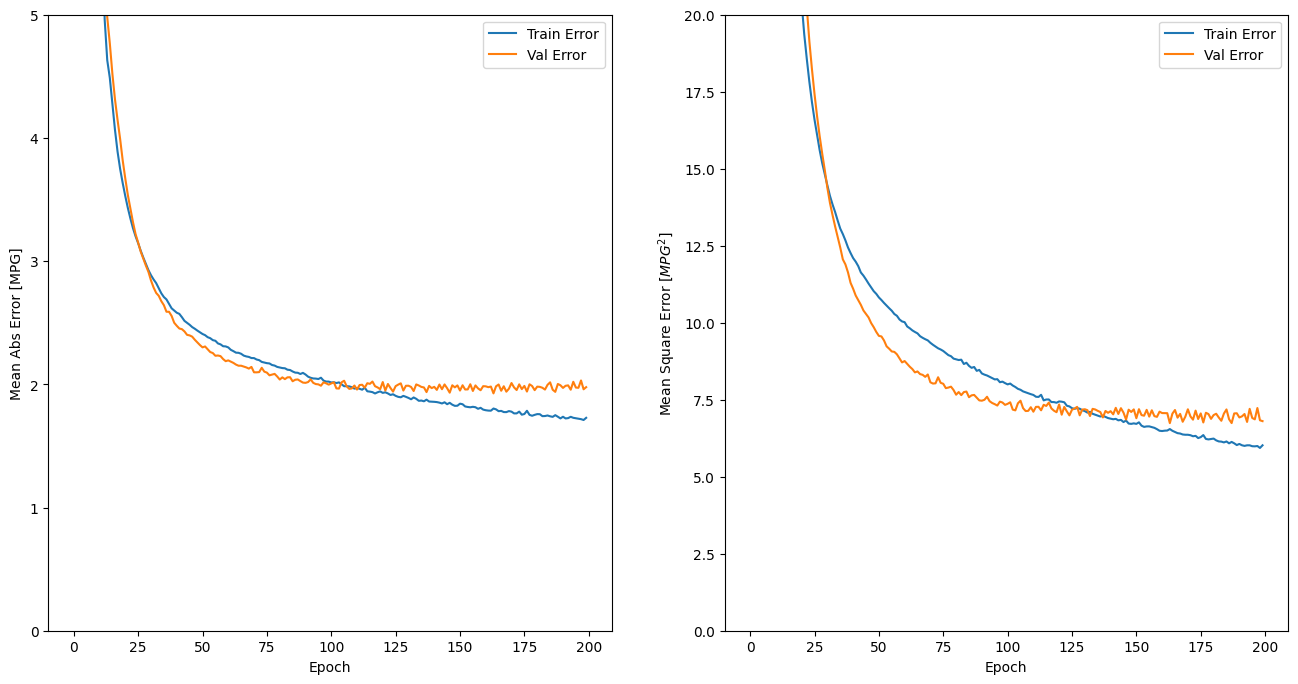

In [55]:
plot_history(history)

# 테스트

In [56]:
loss, mae, mse = model.evaluate(X_test_s, y_test, verbose=2)

3/3 - 0s - loss: 7.0051 - mae: 1.8208 - mse: 7.0051 - 26ms/epoch - 9ms/step


# 예측

In [57]:
y_pred = model.predict(X_test_s)
y_pred

3/3 [==============================] - 0s 1ms/step


array([[24.846731 ],
       [20.75404  ],
       [35.166683 ],
       [25.104694 ],
       [28.400839 ],
       [29.247631 ],
       [13.348243 ],
       [30.798832 ],
       [18.97133  ],
       [31.058264 ],
       [15.24906  ],
       [21.538322 ],
       [17.170036 ],
       [27.93207  ],
       [16.07377  ],
       [30.176971 ],
       [18.59365  ],
       [34.281776 ],
       [28.413263 ],
       [26.767231 ],
       [20.071503 ],
       [44.514412 ],
       [36.985703 ],
       [15.66637  ],
       [29.729364 ],
       [24.626537 ],
       [17.740274 ],
       [17.143753 ],
       [30.085707 ],
       [21.05186  ],
       [14.738035 ],
       [20.324818 ],
       [20.09819  ],
       [34.151524 ],
       [14.3595085],
       [38.219902 ],
       [14.133631 ],
       [24.96569  ],
       [13.669203 ],
       [11.132079 ],
       [14.595952 ],
       [27.539974 ],
       [34.272972 ],
       [26.585144 ],
       [14.846685 ],
       [12.985447 ],
       [17.609371 ],
       [31.34

## 예측 결과 시각화

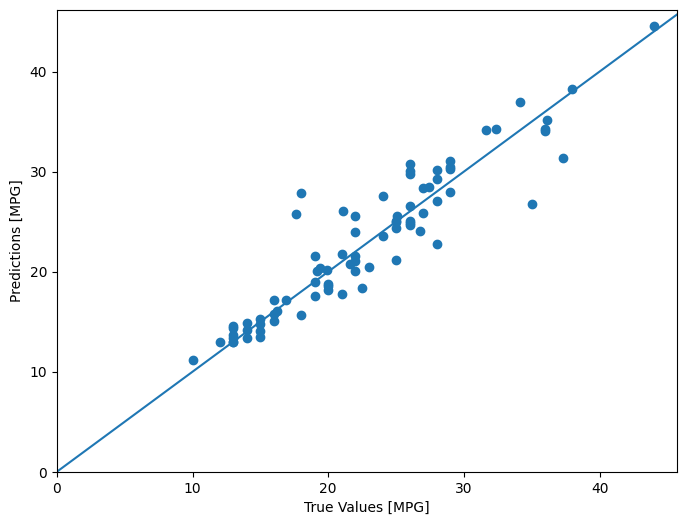

In [58]:
y_pred = y_pred.flatten()

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)

plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')

plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])
plt.show()

## 오차의 시각화

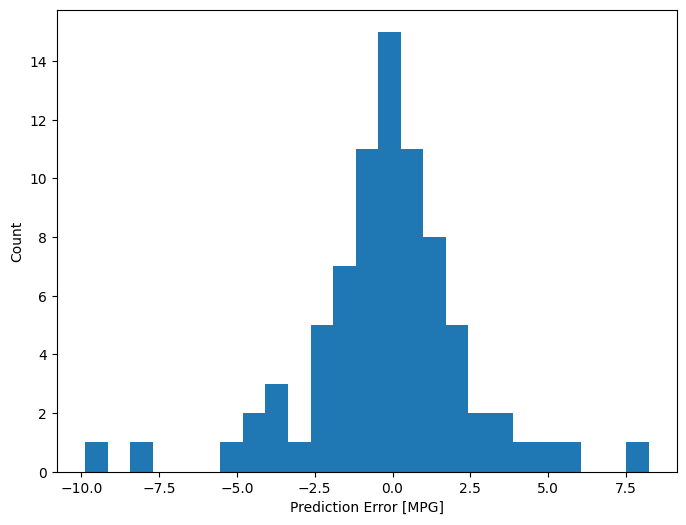

In [59]:
error = y_test - y_pred

plt.figure(figsize=(8,6))
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Count")
plt.show()

# 양 끝단의 오차 범위를 어디까지 볼 것인가